In [441]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import tabulate

#from sklearn import datasets
#from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.pipeline import make_pipeline

#для расчета ROC-кривой
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

#from sklearn.metrics import accuracy_score #доля правильных ответов в классификации
#from sklearn.metrics import mean_squared_error

**Загрузим датасет и проверим на наличие нулевых значений.**

In [442]:
data=pd.read_csv('C:/Users/Лина/Downloads/Обучение/Машинное обучение/Оценка точности модели, переобучение, регуляризация/ДЗ/athletes.csv', delimiter=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [443]:
print('Для height пустых строк {}'.format( len( data[ pd.isnull( data['height'] ) ] ) ))
print('Для weight пустых строк {}'.format( len( data[ pd.isnull( data['weight'] ) ] ) ))
print('Для sport пустых строк {}'.format( len( data[ pd.isnull( data['sport'] ) ] ) ))
print('Всего строк в наборе {}'.format( len( data ) ))

Для height пустых строк 330
Для weight пустых строк 659
Для sport пустых строк 0
Всего строк в наборе 11538


In [444]:
# обнуляем ячейки с отсутствием данных
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

In [445]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


**Создаем модель машинного обучения логической регрессии. Запускаем обучение.**

In [446]:
# попробуем выбрать какие-нибудь признаки
selectedColumns = data[ [ 'height', 'weight', 'sport', 'sex' ] ]

# столбец sport является категориальной переменной
# переведем ее в значения 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies( selectedColumns, columns = [ 'sport' ] )

# столбец sex является целевой переменной, удаляем его из X
del X['sex']
X.head()

,height,weight,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_canoe,sport_cycling,sport_equestrian,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,80.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,71.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [447]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [448]:
le.fit( data['sex'] )

LabelEncoder()

In [449]:
le.classes_

array(['female', 'male'], dtype=object)

In [450]:
y = pd.Series( data = le.transform( data['sex'] ) )
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int32

In [451]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)
len(X_train) + len(X_test) == len(X)

True

In [452]:
model = make_pipeline(
StandardScaler(),
LogisticRegression(max_iter=1000))

In [453]:
model.fit(X_train,y_train)
predictions = model.predict(X_test)
predictions[:100]
model.predict_proba(X_test)

array([[0.88795551, 0.11204449],
       [0.87128244, 0.12871756],
       [0.96182035, 0.03817965],
       ...,
       [0.00214871, 0.99785129],
       [0.19033855, 0.80966145],
       [0.08961287, 0.91038713]])

**Построим ROC-кривую (Receiver Operating Characteristic) с помощью библиотеки sklearn..**

In [458]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve(y_test, predictions)

for line in zip(fpr[:10], tpr[:10], thres[:10]):
    print(line)

(0.0, 0.0, 2)
(0.15384615384615385, 0.8688524590163934, 1)
(1.0, 1.0, 0)


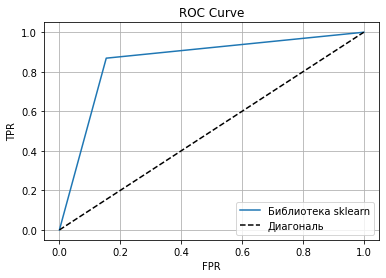

In [459]:
plt.plot(fpr, tpr, label = 'Библиотека sklearn')

# Добавляем диагональ под 45 градусов
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label='Диагональ')

plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.grid()

**Выяислим значение ROC-AUC метрики.**

In [478]:
roc_auc_score(y_test, predictions)

0.8575031525851198

**Рассчитаем метрики TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.**

In [481]:
predictions = predictions[:100]
y_test = y_test[:100]
#y_test = y_test.to_numpy()

tp1 = []
fp1 = []
tn1 = []
fn1 = []

tp = 0
fp = 0
tn = 0
fn = 0

for i in range(10):
    for i in range(len(predictions)):
        if predictions[i] == 1 and y_test[i] == 1:
            tp += 1
    
        elif predictions[i] == 1 and y_test[i] == 0:
            fp += 1
            
        elif predictions[i] == 0 and y_test[i] == 0:
            tn += 1
            
        elif predictions[i] == 0 and y_test[i] == 1:
            fn += 1
            
    tp1.append(tp)
    fp1.append(fp)
    tn1.append(tn)
    fn1.append(fn)

tpr1 = list(map(lambda x: x / len(predictions), tp1))
fpr1 = list(map(lambda x: x / len(predictions), fp1))
    
for line in zip(fpr1, tpr1):
    print(line)

(0.06, 0.53)
(0.12, 1.06)
(0.18, 1.59)
(0.24, 2.12)
(0.3, 2.65)
(0.36, 3.18)
(0.42, 3.71)
(0.48, 4.24)
(0.54, 4.77)
(0.6, 5.3)


**Построим ROC-кривую с помощью вычисленных вручную метрик FRP и TRP. Объединим графики метрик FRP и TRP рассчитанных вручную и с помощью библиотеки sklearn.**

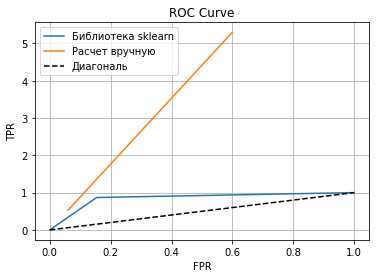

In [482]:
plt.plot(fpr, tpr, label = 'Библиотека sklearn')
plt.plot(fpr1, tpr1, label = 'Расчет вручную')

# Добавляем диагональ под 45 градусов
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label='Диагональ')

plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.grid()


**Построим график Precision-Recall, используя показатели TP, FP и FN, рассчитанные вручную.**

In [483]:
pr = list(map(lambda x: x / (len(tp1) + len(fp1)), tp1))
re = list(map(lambda x: x / (len(tp1) + len(fn1)), tp1)) 
print(pr, re)

[2.65, 5.3, 7.95, 10.6, 13.25, 15.9, 18.55, 21.2, 23.85, 26.5] [2.65, 5.3, 7.95, 10.6, 13.25, 15.9, 18.55, 21.2, 23.85, 26.5]


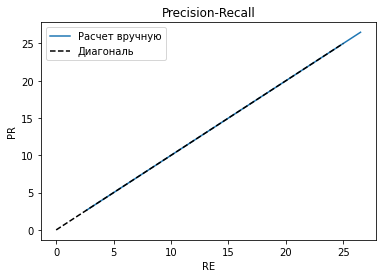

In [484]:
plt.plot(re, pr, label = 'Расчет вручную')

# Добавляем диагональ под 45 градусов
plt.plot([0, 25], [0, 25], color='black', linestyle='dashed', label='Диагональ')

plt.legend()
plt.xlabel('RE')
plt.ylabel('PR')
plt.title('Precision-Recall')
plt.grid()
plt.grid()

**Вычислим значение ROC-AUC метрики, используя показатели TPR и FPR, рассчитанные вручную.**

In [485]:
auc(fpr1, tpr1)

1.5741

**Выводы.**

**1 - Как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?**
*Если линия ROC-кривой проходит близко к диагонали, это указывает на низкую эффективность модели. При этом более быстрый подъем кривой вверх указывает на лучшую производительность модели. При переобучении модели, линия ROC-кривой может находиться ниже диагонали.*

*Так как для нашей модели линия ROC-кривой находится выше диагонали и имеет большую скорость нарастания, можно сделать вывод, что она эффективна и не переобучена.*

**2 - Может ли ROC-кривая проходить ниже диагонали?**
*На основании полученных графиков, можно сделать вывод, что ROC-кривая не может проходить ниже диагонали, если она не переобучена.*